# Probable Signals of Heart Disease

## Explatory Data Analysis

## Contents
### 1. Introduction
### 2. The Goal of Analysis
### 3. General View of the Data
### 4. Data Cleaning
### 5. Exploring the Data
### 6. Feature Engineering
### 7. Results
### 8. Conclusions and Furter Research

## 1. Introduction

   Cardiovascular disease(CVD) is the most seen death cause in all over the world today. Many researches have been done in this area and many of them continues. Like many others, now the researches are more around the data analysis, machine learning models. The questions are, what causes the heart disease and how can we prevent it before it doesn't exist? In our dataset, we have a small size observation to fit the outputs to a predictive model but we have made a simpe explarotary data analysis to obtain a bit more comprehensive look. We have seeked an answer to which variables have more efective on heart disease diagnosis.   

## 2. Goal of the Analysis

The main goal which we try to achieve in this explarotary data analysis is to get more clarified sight for which kind of attributes may be more significant signal of an incoming heart disease. We are not going to go into the deepest point but we wil get better understanding on the data without doubt. 

## 3. General View of the Data

Variables: 

1.  age: The person's age in years
2.  sex: The person's sex (1 = male, 0 = female)
3.  cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
4.  trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
5.  chol: The person's cholesterol measurement in mg/dl
6.  fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
7.  restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or  definite left ventricular hypertrophy by Estes' criteria)
8.  thalach: The person's maximum heart rate achieved
9.  exang: Exercise induced angina (1 = yes; 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
11. slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
12. ca: The number of major vessels (0-3)
13. thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
14. target: Heart disease (0 = no, 1 = yes)

Above we see which variables are numerical and continuous and which variables are categorical. In the raw dataset, data has 76 attributes but all published experiments refer to using only 14 of them. The version which we get also has 14 attributes. 

   *for more information visit the page https://archive.ics.uci.edu/ml/datasets/Heart+Disease*

### Importing the useful libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
import math
from sklearn import preprocessing
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import warnings
from scipy.stats.mstats import winsorize
warnings.filterwarnings('ignore')

### Let's take a look at the data:

In [5]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Data types and numbers of variables:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


## 4. Data Cleaning

### Let's check if the non-assignment values exist, as we see below we have no nan values.

In [9]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Get rid of the outliers:

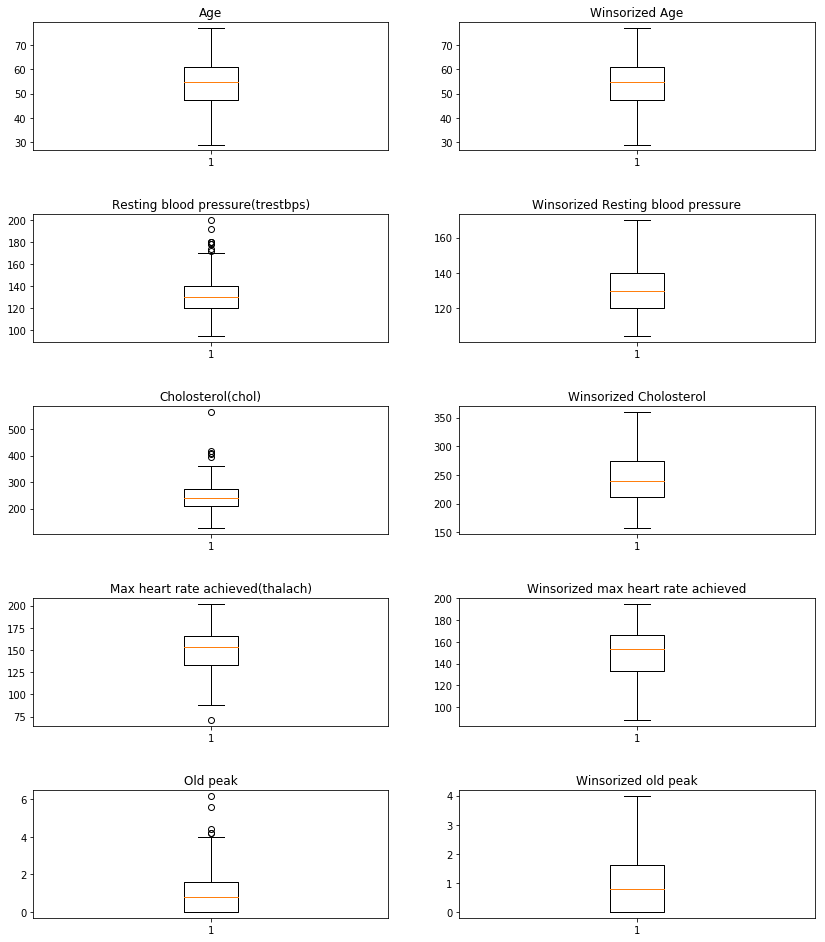

In [10]:
plt.figure(figsize = (14,20))
plt.subplots_adjust(hspace = 0.5)
plt.subplot(621)
plt.boxplot(df.age)
plt.title('Age')
plt.subplot(622)
plt.boxplot(winsorize(df.age))
plt.title('Winsorized Age')
plt.subplot(623)
plt.boxplot(df.trestbps)
plt.title('Resting blood pressure(trestbps)')
plt.subplot(624)
plt.boxplot(winsorize(df.trestbps, 0.03))
plt.title('Winsorized Resting blood pressure')
plt.subplot(625)
plt.boxplot(df.chol)
plt.title('Cholosterol(chol)')
plt.subplot(626)
plt.boxplot(winsorize(df.chol,0.017))
plt.title('Winsorized Cholosterol')
plt.subplot(627)
plt.boxplot(df.thalach)
plt.title('Max heart rate achieved(thalach)')
plt.subplot(628)
plt.boxplot(winsorize(df.thalach, 0.004, axis = -1))
plt.title('Winsorized max heart rate achieved')
plt.subplot(629)
plt.boxplot(df.oldpeak)
plt.title('Old peak')
plt.subplot(6,2,10)
plt.boxplot(winsorize(df.oldpeak, 0.018))
plt.title('Winsorized old peak')
plt.show()

In [11]:
df.trestbps = winsorize(df.trestbps, 0.03)
df.chol = winsorize(df.chol,0.017)
df.thalach = winsorize(df.thalach, 0.004, axis = -1)
df.oldpeak = winsorize(df.oldpeak, 0.018)

Winsorization has been done. Now, there is no overlier left.

## 5. Exploring the Data

### Some statistically meaningful values about data:

In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.422442,245.267327,0.148515,0.528053,149.679868,0.326733,1.024422,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,16.317212,46.518434,0.356198,0.525860,22.682224,0.469794,1.110127,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,104.000000,157.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,170.000000,360.000000,1.000000,2.000000,195.000000,1.000000,4.000000,2.000000,4.000000,3.000000,1.000000


### Categorical variables:

* sex
* fasting blood sugar(fbs)
* resting electrocardiographic results(restecg)
* exercised induced angina(exang)
* thal
* target
* chest pain distribution(cp)

### Continuous variables:
* age
* cholosterol serum(chol)
* maximum heart rate achieved(thalach)
* oldpeak
* slope
* number of major vessels(ca)
* trestbps

### Let's take a look at how many people have been diagnosed with heart disease or not.

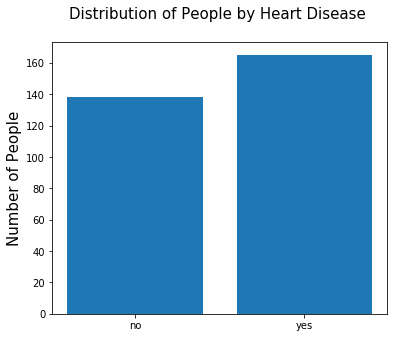

In [13]:
plt.figure(figsize = (6,5))
x = ['no', 'yes']
y = df['target'].value_counts(sort = False).values
plt.bar(x,y)
plt.title('Distribution of People by Heart Disease \n', size = 15)
plt.ylabel('Number of People', size = 15)
plt.show()

Above we checked if the numbers are overly different. The numbers are close and that is fine.

### Let's see the distributions of categorical variables for diagnosed people:

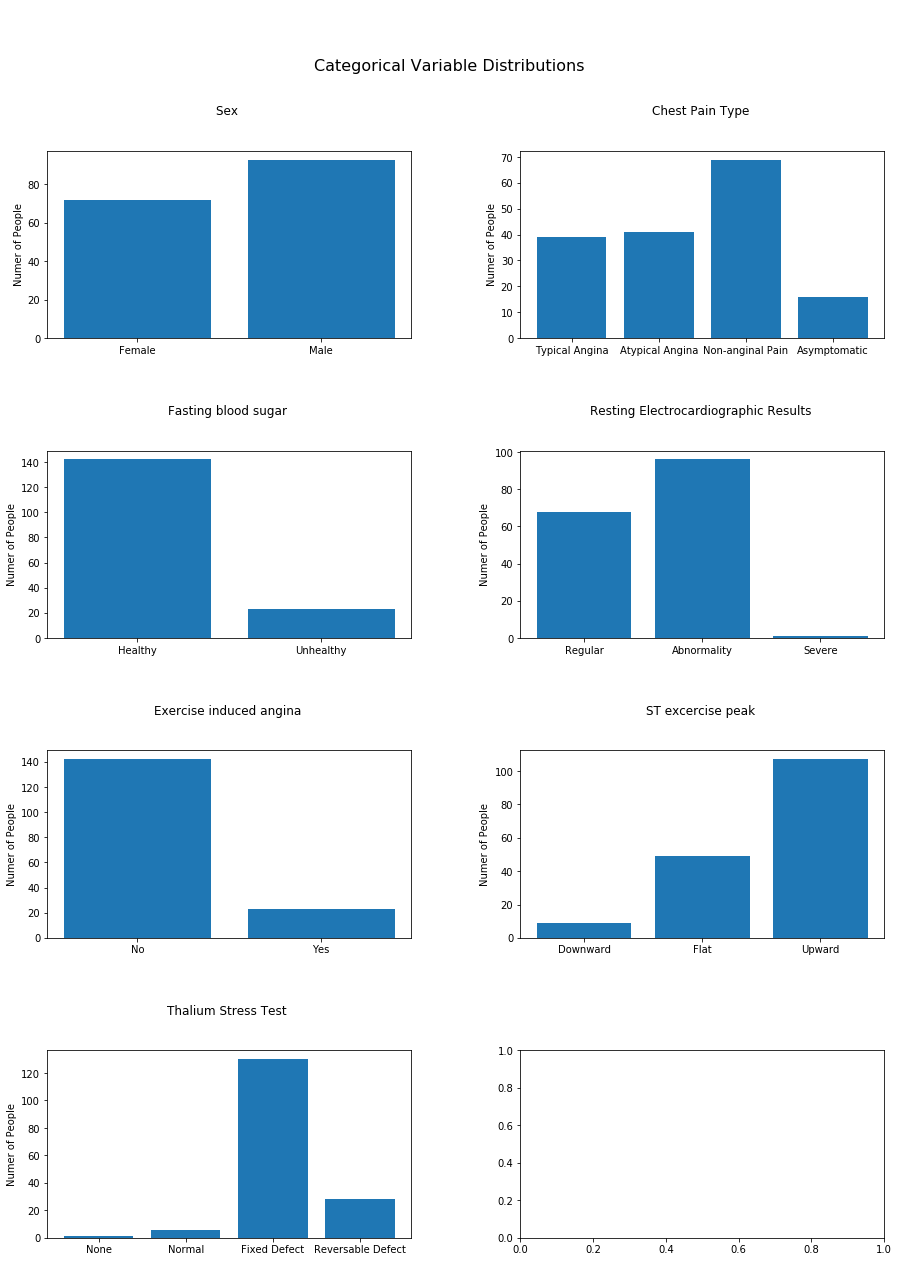

In [14]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (15,20))
fig.suptitle('\n \n \nCategorical Variable Distributions \n \n', fontsize = 16)
plt.subplots_adjust(wspace=0.3, hspace=0.6)
x = ['Female', 'Male']
y = df[df['target']==1].sex.value_counts(sort = False).values 
axes[0][0].bar(x,y)
axes[0][0].set_title('Sex \n\n')
axes[0][0].set_ylabel('Numer of People')

x = ['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic']
y = df[df['target']==1].cp.value_counts(sort=False).values
axes[0][1].bar(x,y)
axes[0][1].set_title('Chest Pain Type \n \n')
axes[0][1].set_ylabel('Numer of People')

x = ['Healthy', 'Unhealthy']
y = df[df['target']==1].fbs.value_counts(sort = False).values
axes[1][0].bar(x,y)
axes[1][0].set_title('Fasting blood sugar \n\n')
axes[1][0].set_ylabel('Numer of People')

x = ['Regular', 'Abnormality', 'Severe']
y = df[df['target']==1].restecg.value_counts(sort = False).values
axes[1][1].bar(x,y)
axes[1][1].set_title('Resting Electrocardiographic Results \n \n')
axes[1][1].set_ylabel('Numer of People')

x = ['No', 'Yes']
y = df[df['target']==1].exang.value_counts(sort = False).values
axes[2][0].bar(x,y)
axes[2][0].set_title('Exercise induced angina \n\n')
axes[2][0].set_ylabel('Numer of People')

x = ['Downward','Flat','Upward']
y = df[df['target']==1].slope.value_counts(sort = False).values
axes[2][1].bar(x,y)
axes[2][1].set_title('ST excercise peak \n \n')
axes[2][1].set_ylabel('Numer of People')

x = ['None','Normal','Fixed Defect','Reversable Defect']
y = df[df['target']==1].thal.value_counts(sort = False).values
axes[3][0].bar(x,y)
axes[3][0].set_title('Thalium Stress Test \n \n')
axes[3][0].set_ylabel('Numer of People')
plt.show()

### Chest pain distribution:

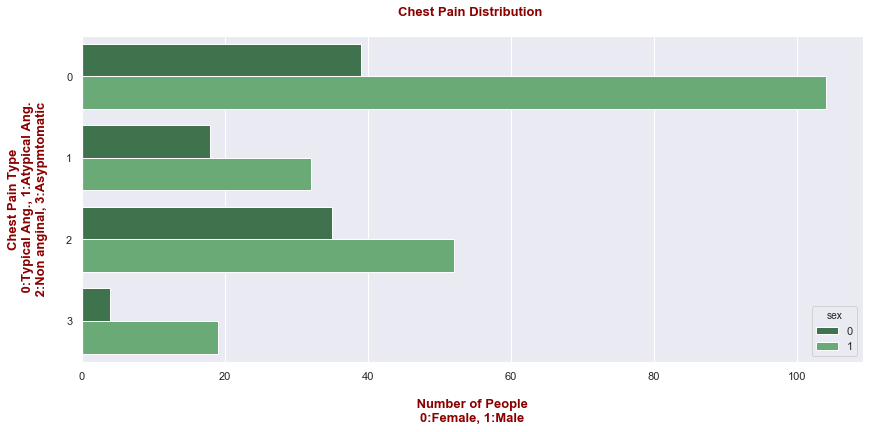

In [15]:
sns.set(style="darkgrid")
baslik_font = {'family': 'arial', 'color': 'darkred', 'weight': 'bold', 'size' : 13}
eksen_font = {'family':'arial', 'color':'darkred', 'weight' : 'bold', 'size':13}
plt.figure(figsize = (14,6))
sns.countplot(y = 'cp', hue = 'sex', data = df, palette = 'Greens_d')
plt.title('Chest Pain Distribution \n', fontdict = baslik_font)
plt.ylabel('Chest Pain Type\n 0:Typical Ang., 1:Atypical Ang.\n 2:Non anginal, 3:Asypmtomatic \n', fontdict = eksen_font)
plt.xlabel(('\n Number of People \n0:Female, 1:Male'), fontdict = eksen_font)
plt.show()

### Correlations of variables for diagnosed people:

In [16]:
corelmat = df[df['target'] == 1].corr()
corelmat

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.190231,0.024934,0.274344,0.247184,0.155415,-0.084360,-0.522761,0.046990,0.174765,-0.109380,0.117463,0.080959,NaN
sex,-0.190231,1.000000,0.039321,0.031265,-0.235356,0.142416,0.018542,0.203310,0.071849,0.031482,0.015768,0.060384,0.229687,NaN
cp,0.024934,0.039321,1.000000,0.196912,-0.066304,0.227776,-0.073879,0.065326,-0.104002,0.206745,-0.127548,0.101492,0.047912,NaN
trestbps,0.274344,0.031265,0.196912,1.000000,0.119360,0.142089,-0.101437,0.029861,-0.045559,0.170381,-0.000403,0.056486,-0.013470,NaN
chol,0.247184,-0.235356,-0.066304,0.119360,1.000000,-0.017956,-0.189678,0.020652,-0.001090,0.025018,0.078286,-0.024401,0.054750,NaN
fbs,0.155415,0.142416,0.227776,0.142089,-0.017956,1.000000,-0.057736,-0.027367,-0.060931,-0.004117,-0.019531,0.095860,0.083362,NaN
restecg,-0.084360,0.018542,-0.073879,-0.101437,-0.189678,-0.057736,1.000000,0.033812,-0.092503,-0.085985,0.138237,0.133233,0.106879,NaN
thalach,-0.522761,0.203310,0.065326,0.029861,0.020652,-0.027367,0.033812,1.000000,-0.173591,-0.181405,0.223045,-0.041572,0.040826,NaN
exang,0.046990,0.071849,-0.104002,-0.045559,-0.001090,-0.060931,-0.092503,-0.173591,1.000000,0.034375,-0.049097,-0.069545,0.083362,NaN
oldpeak,0.174765,0.031482,0.206745,0.170381,0.025018,-0.004117,-0.085985,-0.181405,0.034375,1.000000,-0.475943,-0.075141,0.021342,NaN


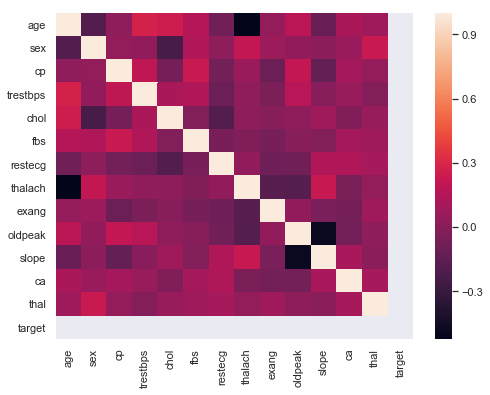

In [17]:
plt.figure(figsize = (8,6))
sns.heatmap(corelmat)
plt.show()

Colors clearly show us that the correlation coefficients are weak.

## 6. Feature Engineering

### Target variable is 'target', it asks "is a patient diagnosed or not?"

Our 'target variable' is diagnosis variable. It is called 'target' in data frame. It has two value, 0 and 1. '0' means the person is not risky about heart disease. '1' means the person is diagnosed as heart diseased. In that part, we are going to try to find what may has impact on cardio vascular diseases. 

### A fast look to aging effect:

In [18]:
print('Mean age of people', df.age.mean())
print('Mean age of risky people',df[df['target']==1].age.mean())
print('Mean age of not risky people', df[df['target']==0].age.mean())

Mean age of people 54.366336633663366
Mean age of risky people 52.4969696969697
Mean age of not risky people 56.60144927536232


In [19]:
print('Patients over 54 diagnosis ratio: {} %'.format(round(df[df['age']>54]['target'].mean()*100,2)))
print('Patients under 54 diagnosis ratio: {} %'.format(round(df[df['age']<=54]['target'].mean()*100,2)))

Patients over 54 diagnosis ratio: 40.88 %
Patients under 54 diagnosis ratio: 69.44 %


In [20]:
t_age = scipy.stats.ttest_ind(df[df['target']==0].age, df[df['target']==1].age)
t_age

Ttest_indResult(statistic=4.014560975148874, pvalue=7.524801303442373e-05)

Age variable also has an impact on our target variable as we see from the 'low p-value'.

In [21]:
a = df[df['sex'] == 0]['target']
b = df[df['sex'] == 1]['target']
t_sex = scipy.stats.ttest_ind(a,b)
c = df[df['fbs'] == 0]['target']
d = df[df['fbs'] == 1]['target']
t_fbs = scipy.stats.ttest_ind(c,d)
e = df[df['exang'] == 0]['target']
f = df[df['exang'] == 1]['target']
t_exang = scipy.stats.ttest_ind(e,f)

arr_1 = ['Sex', 'Fasting blood sugar', 'Exercise induced angina']
arr_2 = [t_sex, t_fbs, t_exang]
for i in range(0,3):
    
    print('For {}: {}'.format(arr_1[i], arr_2[i]))

For Sex: Ttest_indResult(statistic=5.078601298959069, pvalue=6.678692115314158e-07)
For Fasting blood sugar: Ttest_indResult(statistic=0.48676722971222014, pvalue=0.6267775474340544)
For Exercise induced angina: Ttest_indResult(statistic=8.42332702774835, pvalue=1.5208138383314295e-15)


Easily visible above, 'sex' and 'exercise induced angina' has statistical significance if we assume the significance level is 0.005.

### Risk ratios for chest pain types:

In [22]:
pain_types = ['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic']
for i in range (0,4):
    cp_mean = df[df['cp']==i]['target'].mean()
    cp_mean = round(cp_mean, 3)
    print('Heart disease risk for {} is {} %'.format(pain_types[i], cp_mean*100))

Heart disease risk for Typical Angina is 27.3 %
Heart disease risk for Atypical Angina is 82.0 %
Heart disease risk for Non-anginal Pain is 79.3 %
Heart disease risk for Asymptomatic is 69.6 %


As we see, most common type is typical angina but it has low risk ratio compared to others.

### Major vessel distribution of diagnosed people:

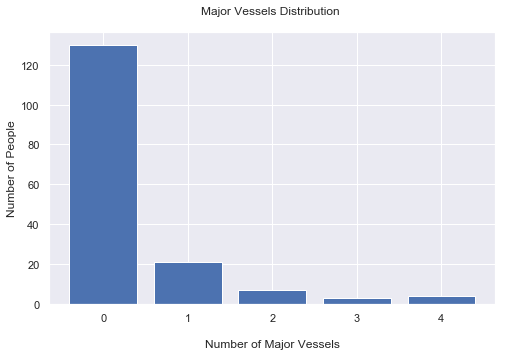

In [25]:
arr_ca = df[df['target']==1].ca.value_counts(sort = False)
x = ['0','1','2','3','4']
plt.figure(figsize = (8,5))
plt.bar(x, arr_ca)
plt.title('Major Vessels Distribution \n')
plt.xlabel('\nNumber of Major Vessels')
plt.ylabel('Number of People')
plt.show()

As wee se above, most of diagnosed people have no major vessels.

### The slopes of the peak exercise ST segment:

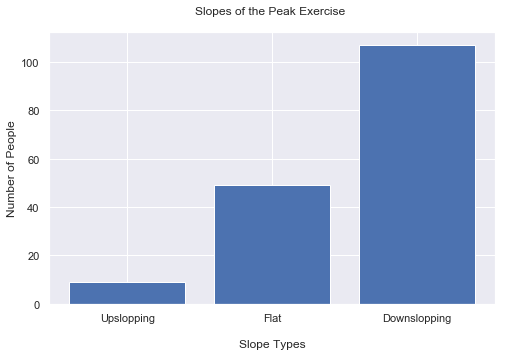

In [26]:
arr_slope = df[df['target']==1].slope.value_counts(sort = False)
x = ['Upslopping', 'Flat', 'Downslopping']
plt.figure(figsize = (8,5))
plt.bar(x,arr_slope)
plt.title('Slopes of the Peak Exercise \n')
plt.ylabel('Number of People')
plt.xlabel('\nSlope Types')
plt.show()

Most of diagnosed people's slope types are 'downslopping' and 'flat' type.

### Plotting the continuous variables by increasing age values:

Below, we will see multiple plots. Left hand side shows the plots of diagnosed, risky peoples. Right hand side shows the not risky people's plots. T-test results are between each variables seperated by target as 0 or 1. It means not risky or risky.

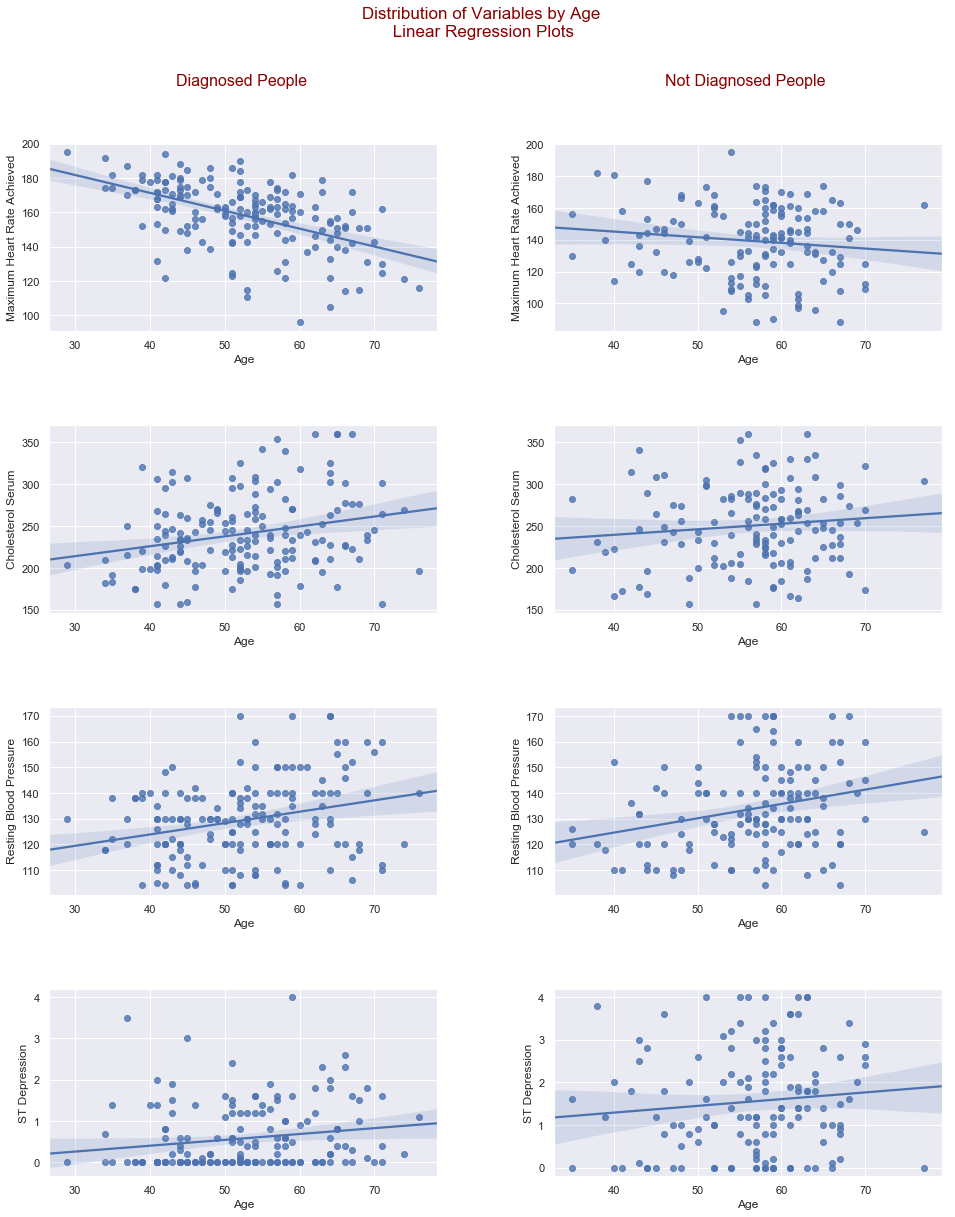

In [27]:
plt.figure(figsize=(16,19))

plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.suptitle('Distribution of Variables by Age\n Linear Regression Plots', size = 17, color = 'darkred')

plt.subplot(421)
plt.title('Diagnosed People \n\n\n', size = 16,color ='darkred')
sns.regplot(df[df['target']==1]['age'], df[df['target']==1]['thalach'])
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate Achieved')

plt.subplot(422)
plt.title('Not Diagnosed People \n\n\n', size = 16,color ='darkred')
sns.regplot(df[df['target']==0]['age'], df[df['target']==0]['thalach'])
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate Achieved')

plt.subplot(423)
sns.regplot(df[df['target']==1]['age'], df[df['target']==1]['chol'])
plt.xlabel('Age')
plt.ylabel('Cholesterol Serum')

plt.subplot(424)
sns.regplot(df[df['target']==0]['age'], df[df['target']==0]['chol'])
plt.xlabel('Age')
plt.ylabel('Cholesterol Serum')

plt.subplot(425)
sns.regplot(df[df['target']==1]['age'], df[df['target']==1]['trestbps'])
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')

plt.subplot(426)
sns.regplot(df[df['target']==0]['age'], df[df['target']==0]['trestbps'])
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')

plt.subplot(427)
sns.regplot(df[df['target']==1]['age'], df[df['target']==1]['oldpeak'])
plt.xlabel('Age')
plt.ylabel('ST Depression')

plt.subplot(428)
sns.regplot(df[df['target']==0]['age'], df[df['target']==0]['oldpeak'])
plt.xlabel('Age')
plt.ylabel('ST Depression')
plt.show()



Here, we obtained T-test results of 4 continuous variables. Maximum heart rate achieved(thalach), cholesterol serum(chol), resting blood pressure(trestbps), ST deppression induced by exercise relative to rest(oldpeak). Then we plotted regression plots by age. 

In [28]:
t_a = scipy.stats.ttest_ind(df[df['target']==1]['thalach'],df[df['target']==0]['thalach'])
t_b = scipy.stats.ttest_ind(df[df['target']==1]['chol'],df[df['target']==0]['chol'])
t_c = scipy.stats.ttest_ind(df[df['target']==1]['trestbps'],df[df['target']==0]['trestbps'])
t_d = scipy.stats.ttest_ind(df[df['target']==1]['oldpeak'],df[df['target']==0]['oldpeak'])

a_1 = ['Max heart rate achieved', 'Cholosterol', 'Resting blood pleasure', 'ST depression']
a_2 = [t_a,t_b,t_c,t_d]
for i in range(0,4):
    print('For {}: {}'.format(a_1[i], a_2[i]))

For Max heart rate achieved: Ttest_indResult(statistic=8.081413505135504, pvalue=1.5685961884291452e-14)
For Cholosterol: Ttest_indResult(statistic=-1.8450949469288447, pvalue=0.06600591944411106)
For Resting blood pleasure: Ttest_indResult(statistic=-2.384497019636299, pvalue=0.01772166556165761)
For ST depression: Ttest_indResult(statistic=-8.4214886230112, pvalue=1.5402537989685674e-15)


All of the attributes are statistically significant but the 'cholosterol'.

### Principal Component Analysis

We have done the principal component analysis to see how much variance shared by less variables. It is important for implementing the data to a machine learning model that we are not going to deal in this analysis. 

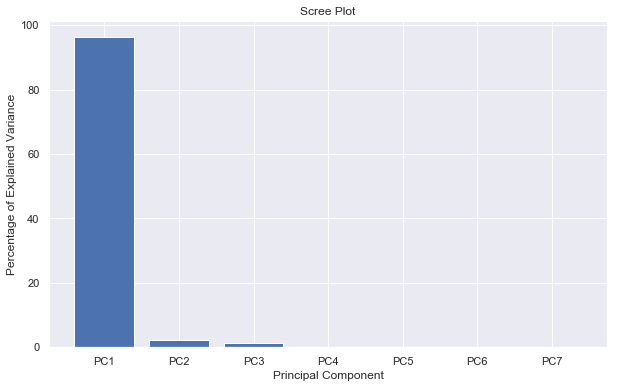

In [30]:
df_2 = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'trestbps','slope']]
plt.figure(figsize = (10,6))
scaled = preprocessing.scale(df_2.T)
pca = PCA()
pca.fit(scaled)
pca_data = pca.transform(scaled)
per_var = np.round(pca.explained_variance_ratio_*100, decimals = 1) 
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [31]:
for i in range(0,3):
    print(per_var[i])

96.5
2.2
1.2


Good result. The first principal component shares 96.1% of variance. That means, there may no need to use all the five variables. 

## 7. Results

Now, we are done with the our analysis. We understood the data, classified variables, plotted graphs, made some tests and tried to achieve what has impact on our target variables. We have got some results;

1. Our target variable is balanced by number of people who are diagnosed or not.

2. Variables which has signifanct impact on heart disease diagnosis:

    * Age
    * Sex; males are more likely to be diagnosed
    * Exercised induced angina(exang)
    * Max heart rate achieved(thalach)
    * Resting blood pressure(trestbps)
    * ST depression(oldpeak)
3. Variables which has no statistical significance:

    * Cholosterol serum(chol)
    * Fasting blood pressure(fbs)
4. Variables which point to significance:

    * Chest pain distribution; all types have different size of heart disease risk. Typical angina is not dangerous as much as others. 
    * Slope types; downslopping and flat types are most seen. Upslopping is rare. 
    * Major vessels; we know that diameters of vessels are important for cardiovascular diseases. Here, most of diagnosed people have no major vessels and this is absolutely a major signal.
    
5. Principal components:

    * Using the pca module in python, we have found out the first principal component represents the most of variance, 96.3 %. 
    

## 8. Conclusions and Further Research

My hypothesis is some of the variables may be a sign of an incoming or already existing heart disease. For a powerful and precise predictive model, we need bigger size of datas, more variables, more observation etc. In this analysis, we have a small size data, does not include sufficient attribute number to speak precise. But simple datas also can say something important about our targets as we have got here. What do we have? Statistically significance values have shown with t-tests. We have seen which attributes may have an impact on heart diseases as explained in the part of results. 

### Suggestions for future works:

What could be done better? In my opinion, we need more attributes and too much more observations to analyze data with high accuracy. For example, the data that includes social daily life, lifestyle, physical attributes, eating, drinking, alcohol and smoking habbits, exercise frequency, exercise types etc. could be really effective for predictions. When the number of observations increase, relations between no-target variables could be investigated more. 